In [1]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from scipy.optimize import curve_fit

In [2]:
path = Path.cwd()
date = "2022-02-22"
datapath = path / (date+'_TK-data')
outputpath = path / 'results'

In [3]:
u = 1.6605 * 1e-27
m85 = 84.91 * u	
m87 = 86.91 * u	 
c = 299792458
kB = 1.380649 * 1e-23

In [21]:
data = pd.read_csv(datapath/(date+"_CAR_background.csv"),header=2,skiprows=[8],sep=';')
bgmean = np.mean(data['HS3-100(17654).Ch2'])
bgstd = np.std(data['HS3-100(17654).Ch2'])
print(bgmean, bgstd)

0.03542864541568999 0.0017552822702845367


## Set 1

Trigger times:

199      0.00995
64264    3.21320
64464    3.22320
Name: Relative time, dtype: float64


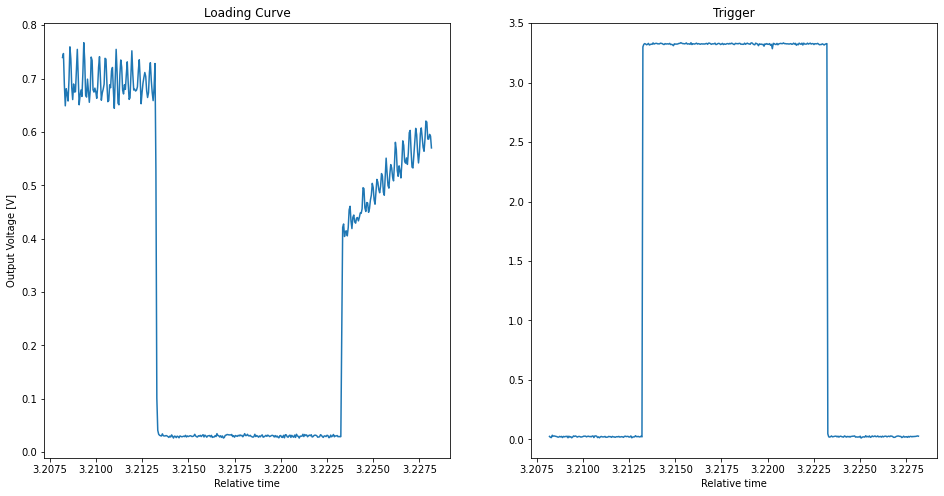

In [84]:
data = pd.read_csv(datapath/(date+"_CAR_10.csv"),header=2,skiprows=[8],sep=';')
diff = np.array([abs(data['HS3-100(17654).Ch1'][i+1]-data['HS3-100(17654).Ch1'][i]) for i in range(0,data.shape[0]-1)])
diff = np.concatenate((diff,[False]))
print("Trigger times:\n")
print(data['Relative time'][diff > 1])
start = data.index[diff > 1][1]-100
stop = data.index[diff > 1][2]+100
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,8))
ax1.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch2'][start:stop])
ax2.plot(data['Relative time'][start:stop],data['HS3-100(17654).Ch1'][start:stop])
ax1.set_xlabel('Relative time')
ax1.set_ylabel('Output Voltage [V]')
ax2.set_xlabel('Relative time')
ax1.set_title('Loading Curve')
ax2.set_title('Trigger')
plt.show()

## Set 2